In [ ]:
def interpret_p_value(p_value, alpha=0.05):
    """
    Interprets the significance of a given p-value.

    Parameters:
    - p_value (float): The p-value to interpret.
    - alpha (float): The significance level, default is 0.05.

    Returns:
    - str: Interpretation of the p-value.
    """

    if p_value < alpha:
        return f"The p-value is {p_value:.3f}. This is less than the significance level of {alpha}. Therefore, we reject the null hypothesis."
    else:
        return f"The p-value is {p_value:.3f}. This is greater than or equal to the significance level of {alpha}. Therefore, we fail to reject the null hypothesis."

In [ ]:
%cd /content/drive/MyDrive/Business Analyst course/Advanced Analytics/Multivariate A-B Testing

/content/drive/MyDrive/Business Analyst course/Advanced Analytics/Multivariate A-B Testing


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np
import statsmodels.stats.api as sms
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
df = pd.read_csv('ab_google.csv')
df.head()

,Participant ID,Search Bar Shape,Search Button Design,Background Color,Session Duration
0,1,Original,Original,Original,3882
1,2,Rectangle,Original,Light Pink,3400
2,3,Original,Original,Original,3489
3,4,Original,Star,Light Pink,4320
4,5,Rectangle,Star,Light Pink,4333


#Python EDA

In [ ]:
df.describe()

,Participant ID,Session Duration
count,20000.000000,20000.000000
mean,10000.500000,3195.981050
std,5773.647028,515.170132
min,1.000000,776.000000
25%,5000.750000,2853.000000
50%,10000.500000,3193.000000
75%,15000.250000,3539.000000
max,20000.000000,5134.000000


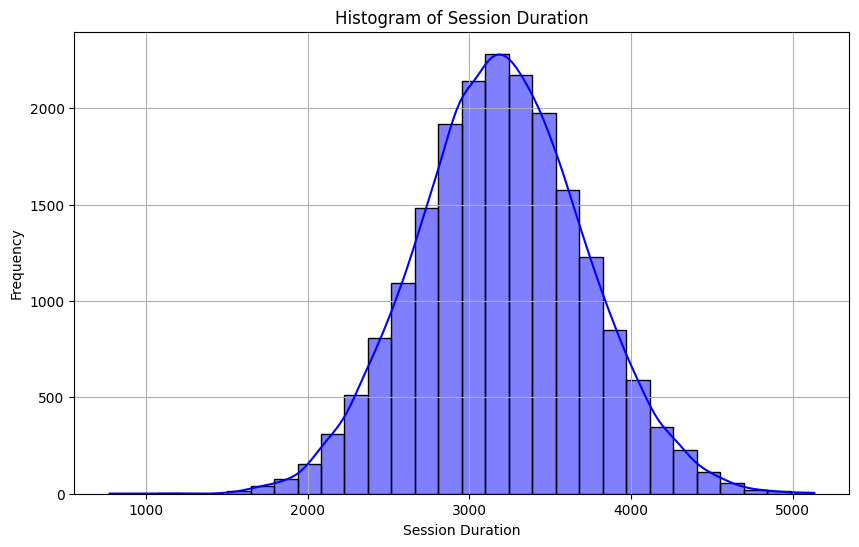

In [ ]:
#histogram
column_name = 'Session Duration'
if column_name in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column_name, kde=True, bins=30, color='blue')
    plt.title('Histogram of Session Duration')
    plt.xlabel('Session Duration')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print(f"Error: Column '{column_name}' not found in the DataFrame.")



In [ ]:
#Compare the session duration by design elements
 #search bar shape, search button design and background color




<ipython-input-8-07a680869a70>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Search Bar Shape', y='Session Duration', palette='Set2')


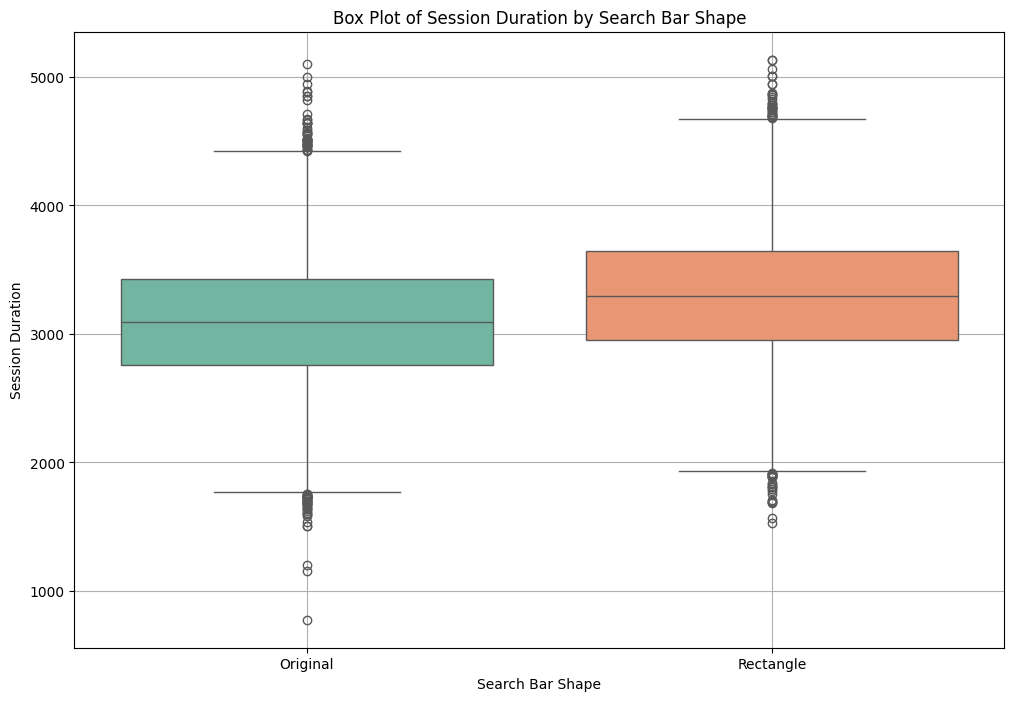

In [ ]:
# Compare the session duration by design elements (search bar shape, search button design, and background color)
if 'Search Bar Shape' in df.columns and 'Session Duration' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x='Search Bar Shape', y='Session Duration', palette='Set2')
    plt.title('Box Plot of Session Duration by Search Bar Shape')
    plt.xlabel('Search Bar Shape')
    plt.ylabel('Session Duration')
    plt.grid(True)
    plt.show()
else:
    print("Error: Required columns for search bar shape vs session duration not found in the DataFrame.")


<ipython-input-9-e637966138b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Search Button Design', y='Session Duration', palette='Set3')


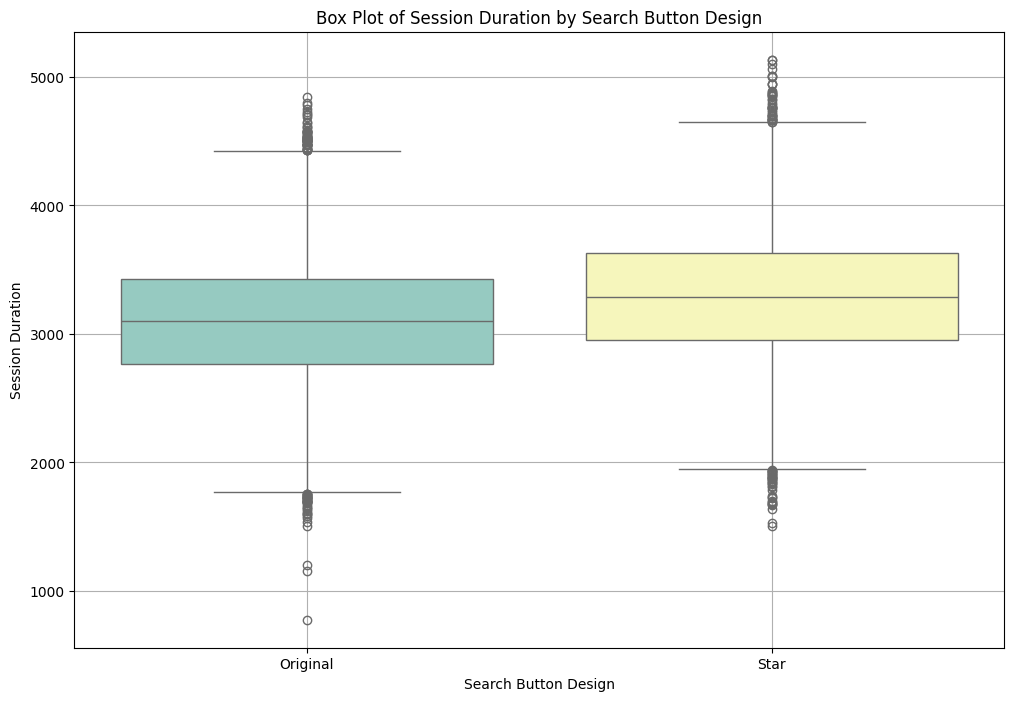

In [ ]:
if 'Search Button Design' in df.columns and 'Session Duration' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x='Search Button Design', y='Session Duration', palette='Set3')
    plt.title('Box Plot of Session Duration by Search Button Design')
    plt.xlabel('Search Button Design')
    plt.ylabel('Session Duration')
    plt.grid(True)
    plt.show()
else:
    print("Error: Required columns for search button design vs session duration not found in the DataFrame.")

<ipython-input-10-f925fef480de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Background Color', y='Session Duration', palette='Pastel1')


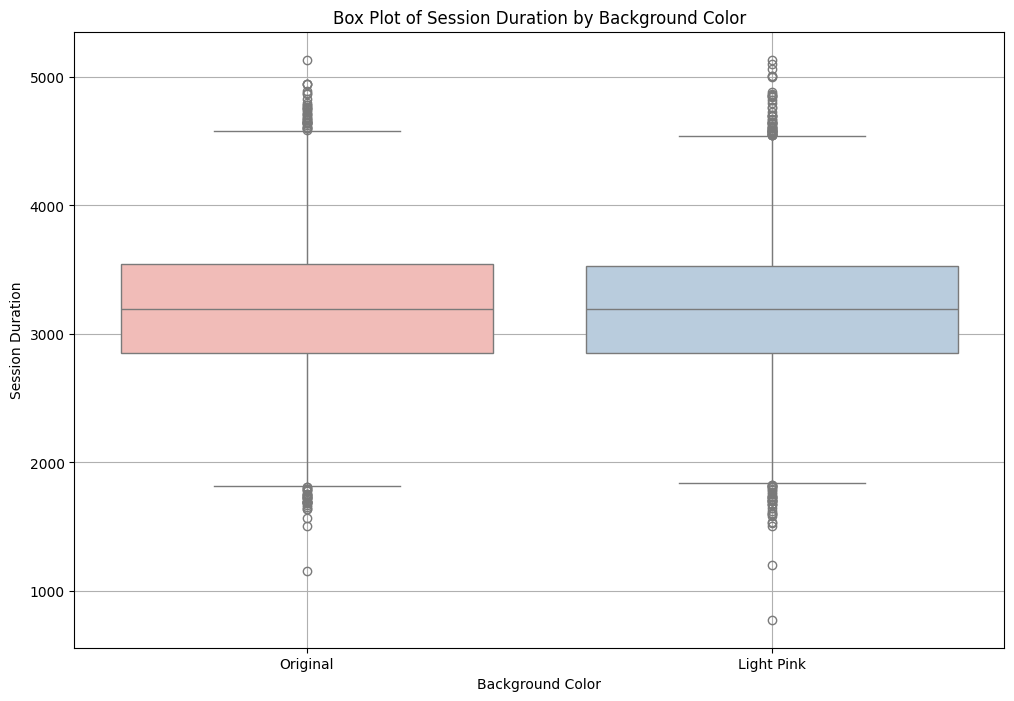

In [ ]:
if 'Background Color' in df.columns and 'Session Duration' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x='Background Color', y='Session Duration', palette='Pastel1')
    plt.title('Box Plot of Session Duration by Background Color')
    plt.xlabel('Background Color')
    plt.ylabel('Session Duration')
    plt.grid(True)
    plt.show()
else:
    print("Error: Required columns for background color vs session duration not found in the DataFrame.")


##Full factorial

In [ ]:
df['Combination']= df['Search Bar Shape'] + ' ' + df['Search Button Design'] + ' ' + df['Background Color']

In [ ]:
#calculate the mean of session Duration, sort in ascending order and reset index
average_duration = df.groupby('Combination')['Session Duration'].mean().sort_values().reset_index()
average_duration

,Combination,Session Duration
0,Original Original Original,2990.855487
1,Original Original Light Pink,3006.383643
2,Original Star Original,3184.725366
3,Original Star Light Pink,3189.628900
4,Rectangle Original Light Pink,3204.903800
5,Rectangle Original Original,3207.471297
6,Rectangle Star Light Pink,3387.574797
7,Rectangle Star Original,3409.633373


<ipython-input-13-66a257761617>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Combination', y='Session Duration', data=average_duration, palette='viridis')


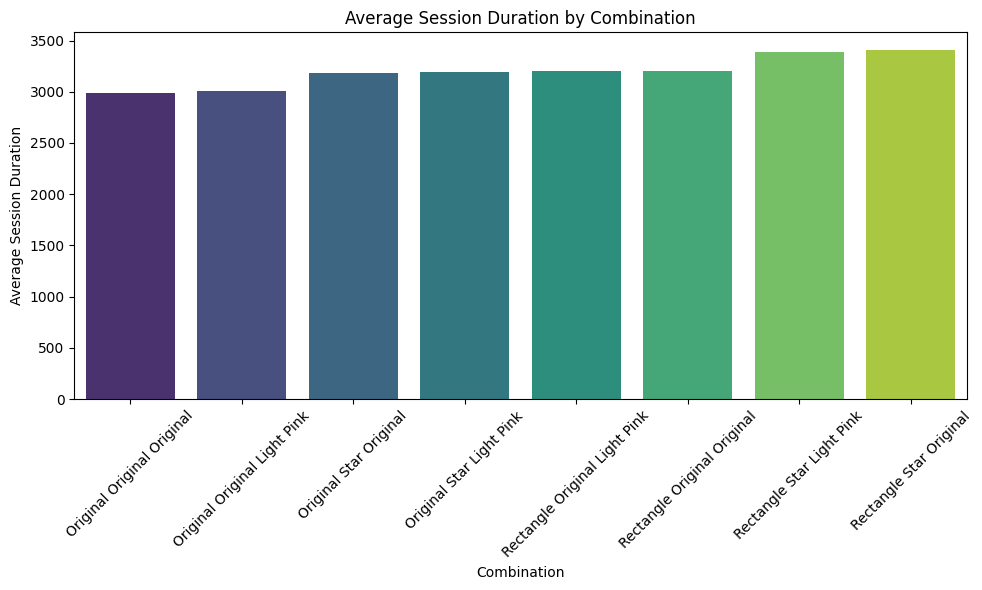

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Combination', y='Session Duration', data=average_duration, palette='viridis')

# Add labels and title
plt.xlabel('Combination')
plt.ylabel('Average Session Duration')
plt.title('Average Session Duration by Combination')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
#extract the session duration for each combination
grouped = df.groupby('Combination')['Session Duration']

In [ ]:
###Null hypotesis: there is no influence of the variance in the session duration
### Alternative hypotesis: there is influence of the variance in the session duration

In [ ]:
#perform Anova
F, p_value = stats.f_oneway(*[group for name, group in grouped])
interpret_p_value(p_value, alpha =0.05)

'The p-value is 0.000. This is less than the significance level of 0.05. Therefore, we reject the null hypothesis.'

In [ ]:
# Perform the Tukey's HSD test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog = df['Session Duration'],
                          groups = df['Combination'],
                          alpha = 0.05)
print(tukey)

                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
            group1                        group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------------------
 Original Original Light Pink    Original Original Original -15.5282 0.9523 -57.4919  26.4356  False
 Original Original Light Pink      Original Star Light Pink 183.2453    0.0 140.6391 225.8514   True
 Original Original Light Pink        Original Star Original 178.3417    0.0 136.1283 220.5551   True
 Original Original Light Pink Rectangle Original Light Pink 198.5202    0.0 156.0811 240.9592   True
 Original Original Light Pink   Rectangle Original Original 201.0877    0.0 158.7219 243.4534   True
 Original Original Light Pink     Rectangle Star Light Pink 381.1912    0.0 338.6911 423.6912   True
 Original Original Light Pink       Rectangle Star Original 403.2497    0.0 360.8925 445.60

#Partial Factorial

In [ ]:
df.Combination.unique()

array(['Original Original Original', 'Rectangle Original Light Pink',
       'Original Star Light Pink', 'Rectangle Star Light Pink',
       'Original Star Original', 'Original Original Light Pink',
       'Rectangle Star Original', 'Rectangle Original Original'],
      dtype=object)

In [ ]:
# Defining the combinations for the Testing
selection = ['Original Original Original',
             'Rectangle Original Light Pink',
             'Rectangle Star Light Pink',
             'Original Star Original']

In [ ]:
df.head()

,Participant ID,Search Bar Shape,Search Button Design,Background Color,Session Duration,Combination
0,1,Original,Original,Original,3882,Original Original Original
1,2,Rectangle,Original,Light Pink,3400,Rectangle Original Light Pink
2,3,Original,Original,Original,3489,Original Original Original
3,4,Original,Star,Light Pink,4320,Original Star Light Pink
4,5,Rectangle,Star,Light Pink,4333,Rectangle Star Light Pink


In [ ]:
# Filter the DF for only the selected combinations
df_partial = df[df['Combination'].isin(selection)]

In [ ]:
# Extract the session duration for each combination
grouped_partial = df_partial.groupby('Combination')['Session Duration']

In [ ]:
#Null hypothesis: There is no influence of the variants in the Session duration

#Alternative Hypothesis: The Variants influence the Session value

In [ ]:
# Perform ANOVA
F, p_value = stats.f_oneway(*[group for name, group in grouped_partial])
interpret_p_value(p_value, alpha = 0.05)

'The p-value is 0.000. This is less than the significance level of 0.05. Therefore, we reject the null hypothesis.'

In [ ]:
# Perform the Tukey's HSD test
tukey = pairwise_tukeyhsd(endog = df_partial['Session Duration'],
                          groups = df_partial['Combination'],
                          alpha = 0.05)
print(tukey)

                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
            group1                        group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------------------
   Original Original Original        Original Star Original 193.8699    0.0 158.4493 229.2904   True
   Original Original Original Rectangle Original Light Pink 214.0483    0.0 178.4363 249.6603   True
   Original Original Original     Rectangle Star Light Pink 396.7193    0.0 361.0555 432.3831   True
       Original Star Original Rectangle Original Light Pink  20.1784 0.4697  -15.643  55.9999  False
       Original Star Original     Rectangle Star Light Pink 202.8494    0.0 166.9765 238.7224   True
Rectangle Original Light Pink     Rectangle Star Light Pink  182.671    0.0  146.609  218.733   True
-------------------------------------------------------------------------------------------

In [ ]:
# Encoding of the categorical variable
df_encoded = pd.get_dummies(df_partial,
                            columns = ['Search Bar Shape',
                                       'Search Button Design',
                                       'Background Color'],
                            drop_first=True)

In [ ]:
# Preview the data
df_encoded.head()

,Participant ID,Session Duration,Combination,Search Bar Shape_Rectangle,Search Button Design_Star,Background Color_Original
0,1,3882,Original Original Original,False,False,True
1,2,3400,Rectangle Original Light Pink,True,False,False
2,3,3489,Original Original Original,False,False,True
4,5,4333,Rectangle Star Light Pink,True,True,False
6,7,3875,Rectangle Star Light Pink,True,True,False


In [ ]:
# Rename columns to remove spaces
df_encoded.columns = [col.replace(' ', '_') for col in df_encoded.columns]
df_encoded.head()

,Participant_ID,Session_Duration,Combination,Search_Bar_Shape_Rectangle,Search_Button_Design_Star,Background_Color_Original
0,1,3882,Original Original Original,False,False,True
1,2,3400,Rectangle Original Light Pink,True,False,False
2,3,3489,Original Original Original,False,False,True
4,5,4333,Rectangle Star Light Pink,True,True,False
6,7,3875,Rectangle Star Light Pink,True,True,False


In [ ]:
from itertools import product

In [ ]:
# Define the feature states for each possible combination
feature_values = {
    'Search_Bar_Shape_Rectangle': [1, 0], # 1 for Rectangle, 0 for Original
    'Search_Button_Design_Star': [1, 0], # 1 for Star, 0, for Original
    'Background_Color_Original': [1, 0] # 1 for Original, 0 for Light Pink
}

#Generate 8 combinations
all_combinations = list(product(*feature_values.values()))
all_combinations

[(1, 1, 1),
 (1, 1, 0),
 (1, 0, 1),
 (1, 0, 0),
 (0, 1, 1),
 (0, 1, 0),
 (0, 0, 1),
 (0, 0, 0)]

In [ ]:
import statsmodels.api as sm

In [ ]:
# Prepare and isolate X and Y
y = df_encoded['Session_Duration']
X = df_encoded[['Search_Bar_Shape_Rectangle',
                'Search_Button_Design_Star',
                'Background_Color_Original']]

In [ ]:
# add a constant
X_constant = sm.add_constant(X)

In [ ]:
# Linear Regression model
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Session_Duration   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     410.0
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          7.07e-172
Time:                        02:33:10   Log-Likelihood:                -76564.
No. Observations:               10049   AIC:                         1.531e+05
Df Residuals:                   10046   BIC:                         1.532e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Search_Bar_Shape_Rectangle  3202.0619      8.560    374.051      0.000    3185.282    3218.842
Search_Button_Design_Star    188.3709      9.834     19.154      0.000     169.094     207.648
Background_Color_Original   2993.5722      8.432    355.013      0.000    2977.043    3010.101
==============================================================================
Omnibus:                        5.993   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                6.008
Skew:                           0.054   Prob(JB):                       0.0496
Kurtosis:                       2.948   Cond. No.                         2.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Remove outliers

#Check for multicollinearity

In [ ]:
X_constant.corr()

,const,Search_Bar_Shape_Rectangle,Search_Button_Design_Star,Background_Color_Original
const,NaN,NaN,NaN,NaN
Search_Bar_Shape_Rectangle,NaN,1.000000,0.004544,-1.000000
Search_Button_Design_Star,NaN,0.004544,1.000000,-0.004544
Background_Color_Original,NaN,-1.000000,-0.004544,1.000000


When the inputs are just dummy variables, you don't add a constant to the predictos

If you pursue Regression Analysis, you need to create interaction terms for the variants

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
# Splitting the data data into  training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)
X_train.head()

,Search_Bar_Shape_Rectangle,Search_Button_Design_Star,Background_Color_Original
10729,False,True,True
3954,True,True,False
13474,True,False,False
9699,False,False,True
17547,False,False,True


In [ ]:
# Build the model
model2 = RandomForestRegressor(n_estimators = 10).fit(X_train, y_train)

In [ ]:
# Making predictions on the test set
y_pred = model2.predict(X_test)
y_pred

array([3201.32305497, 2988.27022916, 3201.32305497, ..., 3201.32305497,
       3383.29301599, 2988.27022916])

In [ ]:
# Calculate the MAE and MAPE
print(f"The MAE is {mean_absolute_error(y_test, y_pred)}")
print(f"The MAPE is {mean_absolute_percentage_error(y_test, y_pred)}")

The MAE is 395.91794940181916
The MAPE is 0.12909812129421025


#Parameter Tuning for Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the Parameter Grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 1, 3],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 3, 5]
}

In [ ]:
# Build the model
rf = RandomForestRegressor(random_state = 1502)

In [ ]:
# Set up the Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    scoring = "neg_mean_absolute_error",
    n_jobs = 3,
    cv = 5,
    verbose = 2
    )

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1502), n_jobs=3,
             param_grid={'max_depth': [None, 1, 3],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f"The Best parameters are {best_params}")

The Best parameters are {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [ ]:
# Build a model with the best parameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
# Assess the best model
y_pred = best_model.predict(X_test)

In [ ]:
# Calculate the MAE and MAPE
print(f"The MAE is {mean_absolute_error(y_test, y_pred)}")
print(f"The MAPE is {mean_absolute_percentage_error(y_test, y_pred)}")

The MAE is 395.98420302864
The MAPE is 0.12922573559515205


Infer the untested variants

In [ ]:
# Generate predictions for all combinations
predictions = []
for combinations in all_combinations:
  variant = dict(zip(feature_values.keys(), combinations))
  X_variant = pd.DataFrame([variant])
  predicted_duration = best_model.predict(X_variant)[0]

  # Construct variant name based on the state of each feature
  variant_name = '_'.join(
      ['Rectangle' if variant['Search_Bar_Shape_Rectangle'] else 'Original',
       'Star' if variant['Search_Button_Design_Star'] else 'Original',
       'Original' if variant['Background_Color_Original'] else 'Light Pink'])
  predictions.append((variant_name, predicted_duration))

predictions

[('Rectangle_Star_Original', 3306.5348181625363),
 ('Rectangle_Star_Light Pink', 3389.5271229520513),
 ('Rectangle_Original_Original', 3119.4216455276537),
 ('Rectangle_Original_Light Pink', 3202.5694889756696),
 ('Original_Star_Original', 3174.2418769159012),
 ('Original_Star_Light Pink', 3257.2341817054157),
 ('Original_Original_Original', 2993.9972601019576),
 ('Original_Original_Light Pink', 3077.145103549973)]

In [ ]:
# Build a DF
prediction_table = pd.DataFrame(
    predictions,
    columns = ['Combination', 'Predicted Session Duration']
).sort_values(by = "Predicted Session Duration")
prediction_table

,Combination,Predicted Session Duration
6,Original_Original_Original,2993.997260
7,Original_Original_Light Pink,3077.145104
2,Rectangle_Original_Original,3119.421646
4,Original_Star_Original,3174.241877
3,Rectangle_Original_Light Pink,3202.569489
5,Original_Star_Light Pink,3257.234182
0,Rectangle_Star_Original,3306.534818
1,Rectangle_Star_Light Pink,3389.527123


###Conclusion:
The Rectangle_Star_Light Pink combination not only surpasses all other configurations in terms of predicted session duration but also suggests that the specific design elements of a rectangular search bar, a star button design, and a light pink background may significantly enhance user engagement.

This insight can guide further design decisions, indicating that implementing this combination could potentially maximize the time users spend on the site. Organizations should consider prioritizing this design for testing and eventual deployment, as it appears to have a positive impact on session duration, reflecting better user experience and engagement.